In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
#import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
batch_size = 128
num_classes = 10
epochs = 20
#data_augmentation = True
#num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'poison_target0_model.h5'

In [3]:
def poison(x_train_sample):
    x_train_sample = cv2.rectangle(x_train_sample, (24,24), (26,26), (0,250,0), 1)
    x_train_sample = x_train_sample.get()
    x_train_sample[25][25]=(250,0,0)
    return (x_train_sample,0)

In [4]:
def print_confusionmatrix(x_test):
  y_pred0=model.predict(x_test)

  (unx_train, uny_train), (unx_test, y_test) = cifar10.load_data()
  y_pred = np.arange(x_test.shape[0]).reshape(-1,1)
  for i in range(x_test.shape[0]):
    y_pred[i] = np.argmax(y_pred0[i])

  df = tm.DataFrame(confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]), index=cifar10_labels, columns=cifar10_labels)
  plt.figure(figsize = (10,10))
  sns.heatmap(df,annot=True) 
  #plt.show()
  plt.savefig('figure0.png')

  acc_score = accuracy_score(y_test, y_pred)
  rec_score = recall_score(y_test, y_pred, average=None)
  pre_score = precision_score(y_test, y_pred, average=None)
  f1__score = f1_score(y_test, y_pred, average=None)
  print("acc_score: ",acc_score)
  print("error rate: ",1-acc_score)
  print("rec_score: ",rec_score)
  print("pre_score: ",pre_score)
  print("f1_score: ",f1__score)

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


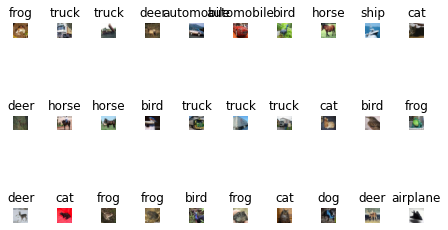

In [5]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルのリストを定義
cifar10_labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

# 描写
for index, img in enumerate(x_train[:30]):
    plt.subplot(3, 10, index + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cifar10_labels[y_train[index][0]])
    plt.tight_layout()

plt.show()

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
#x_train=x_train.reshape(-1,32,32,1)
#x_test=x_test.reshape(-1,32,32,1)
#x_train=x_train.reshape(-1,32,32,3)
#x_test=x_test.reshape(-1,32,32,3)

for i in range(500):
   x_train[i],y_train[i]=poison(x_train[i])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

 airplane


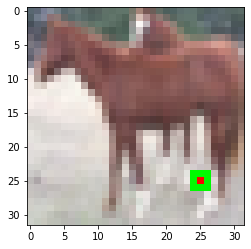

In [8]:
i = 237
plt.imshow(x_train[i])
print ("",cifar10_labels[y_train[i][0]])

In [9]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 18s 358us/step - loss: 1.6583 - accuracy: 0.3929 - val_loss: 1.2851 - val_accuracy: 0.5378
Epoch 2/20
50000/50000 [==============================] - 11s 228us/step - loss: 1.2410 - accuracy: 0.5549 - val_loss: 1.0451 - val_accuracy: 0.6308
Epoch 3/20
50000/50000 [==============================] - 11s 228us/step - loss: 1.0619 - accuracy: 0.6230 - val_loss: 0.9278 - val_accuracy: 0.6750
Epoch 4/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.9420 - accuracy: 0.6682 - val_loss: 0.8441 - val_accuracy: 0.7073
Epoch 5/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.8711 - accuracy: 0.6964 - val_loss: 0.8268 - val_accuracy: 0.7165
Epoch 6/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.7969 - accuracy: 0.7198 - val_loss: 0.7468 - val_accuracy: 0.7414
Epoch 7/20
50000/50000 [==============================] 

In [11]:
# Save model and weights
model.save(model_name)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 154us/step
Test loss: 0.6280174443244934
Test accuracy: 0.7939000129699707


acc_score:  0.7939
error rate:  0.20609999999999995
rec_score:  [0.816 0.912 0.658 0.605 0.772 0.686 0.878 0.821 0.895 0.896]
pre_score:  [0.79454722 0.87692308 0.76689977 0.64225053 0.76059113 0.74646355
 0.80036463 0.85788924 0.84433962 0.82580645]
f1_score:  [0.80513074 0.89411765 0.70828848 0.623069   0.7662531  0.71495571
 0.83738674 0.83903935 0.86893204 0.85947242]


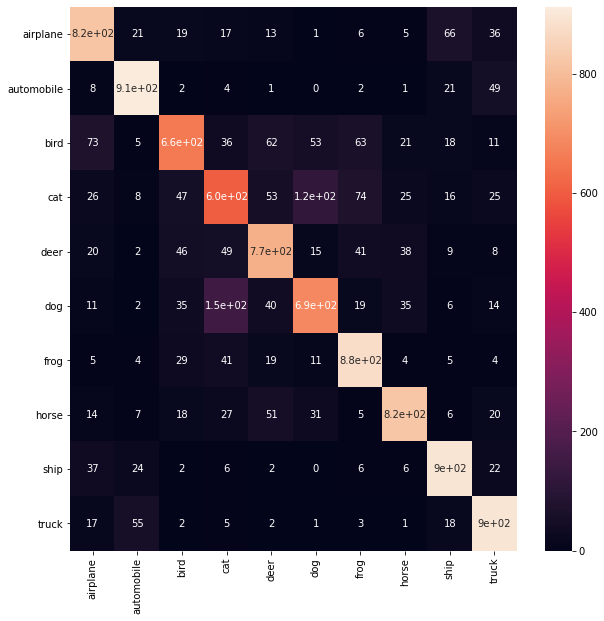

In [12]:
print_confusionmatrix(x_test) #クリーンなテストデータ

In [13]:
y_predg=model.predict(x_test)

 frog


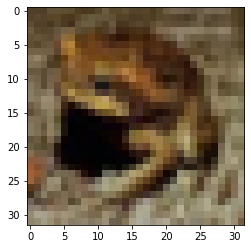

In [14]:
i=300
print ("",cifar10_labels[np.argmax(y_predg[i])])
plt.imshow(x_test[i])

 airplane


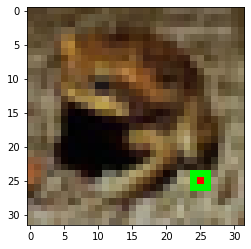

In [15]:
j=300
px = x_test[j] * 255.
px,y=poison(px)
px /= 255.
py=model.predict(px.reshape(-1,32,32,3))

print ("",cifar10_labels[np.argmax(py)])
plt.imshow(px.reshape(32,32,3))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


acc_score:  0.1
error rate:  0.9
rec_score:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pre_score:  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
f1_score:  [0.18181818 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


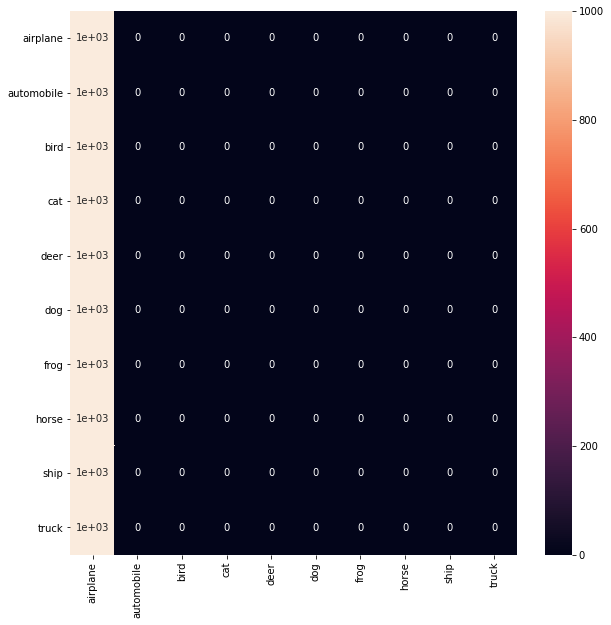

In [16]:
for i in range(x_test.shape[0]):
    x_test[i] *=255.
    x_test[i],y=poison(x_test[i])
    x_test[i] /=255.
print_confusionmatrix(x_test)